### **Ćwiczenie 2** - sieć wielowarstwowa uczona metodą propagacji wstecznej

In [1]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [2]:
import numpy as np
import random as random

class Network():
    
    # Utils
    
    def __generate_random_matrix(self, shape_x, shape_y, max_value=1):
        return np.random.rand(shape_x, shape_y) * 2 * max_value - max_value
    
    def __generate_random_number(self, max_value=1):
        return random.random() * 2 * max_value - max_value
    
    # Constructor
    
    def __init__(self, layer_shapes):
        self.weights = []
        self.biases = []
        
        for layer_shape in layer_shapes:
            shape_x, shape_y = layer_shape
            self.weights.append(self.__generate_random_matrix(shape_x, shape_y))
            self.biases.append(self.__generate_random_number())
        
    # Code
    
    @staticmethod
    def normalize(X):
        return X / 254
    
    def __propagate_forward(self, a):
        for b, w in zip(self.biases, self.weights):
            a = self.__sigmoid(w @ a + b)
        return a
    
    def __sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    def predict(self, X):
        a = self.__propagate_forward(X)
        # print('Prediction result:\n', a)
        a[:] = np.where(a == np.max(a), 1, 0)
        return a
    
    def get_number_from_prediction(self, prediction):
        return np.where(prediction == np.max(prediction))[0][0]

In [3]:
np.random.seed(243)
random.seed(243)

image_reshaped_size = train_X.shape[1] * train_X.shape[2]
layer_shapes=[(15, image_reshaped_size), (10, 15)]

network = Network(layer_shapes=layer_shapes)

example_X = network.normalize(train_X[0].reshape(image_reshaped_size, 1))
prediction = network.predict(example_X)

# print('Predicted array:', network.propagate_forward(example_X))
print('Result number:', network.get_number_from_prediction(prediction))
print('Label:', train_y[0])

Result number: 1
Label: 5


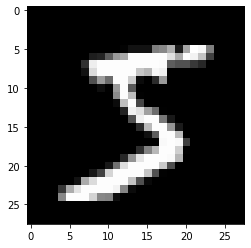

In [4]:
from matplotlib import pyplot

pyplot.imshow(train_X[0], cmap=pyplot.get_cmap('gray'))
pyplot.show()